In [1]:
import os
import pandas as pd
os.chdir("C:/Users/Sanket/Downloads")
train = pd.read_csv("TrainDataset1.csv")

In [2]:
train['Exp'] = train["experience"].str.extract("(\d*\d.?\d+)", expand=True)
train['Exp'] = train['Exp'].str.split('-')
train[['start','end']] = pd.DataFrame(train.Exp.values.tolist())
train['Avg_Exp'] = train[['start','end']].astype(float).mean(axis=1)
train['Salary'] = train['salary'].str.split('to')
train[['sal_start','sal_end']] = pd.DataFrame(train.Salary.values.tolist())
train['Avg_Salary'] = train[['sal_start','sal_end']].astype(float).mean(axis=1)

X = train[['job_desig', 'key_skills', 'City coded', 'Avg_Exp', 'Avg_Salary','company_name_encoded']]

X.dropna(subset=['key_skills'], inplace=True)
X['Avg_Exp'] = X['Avg_Exp'].astype(int)
X['Avg_Salary'] = X['Avg_Salary'].astype(int)

C:\Users\Sanket\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Sanket\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\Sanket\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs

In [3]:
X.head()

,job_desig,key_skills,City coded,Avg_Exp,Avg_Salary,company_name_encoded
0,Senior Exploit and Vulnerability Researcher,"team skills, communication skills, analytical ...",Delhi NCR,6,8,3687
1,Head SCM,"ppc, logistics, inventory management, supply c...",Tier 2,13,12,458
2,Deputy Manager - Talent Management & Leadershi...,"HR Analytics, Employee Engagement, Training, S...",Delhi NCR,7,20,4195
3,Associate Manager Data Engineering,"SQL, Javascript, Automation, Python, Ruby, Ana...",Bengaluru,8,12,313
4,TS- GSA- Senior Analyst,"accounting, finance, cash flow, financial plan...",Delhi NCR,2,4,1305


In [4]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse import csr_matrix, hstack
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer

In [5]:
X.job_desig = X.job_desig.astype(str)

descr = X[['job_desig','key_skills', 'Avg_Salary']]
descr['count'] = descr['job_desig'].apply(lambda x : len(str(x)))
descr.head()

C:\Users\Sanket\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
C:\Users\Sanket\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,job_desig,key_skills,Avg_Salary,count
0,Senior Exploit and Vulnerability Researcher,"team skills, communication skills, analytical ...",8,43
1,Head SCM,"ppc, logistics, inventory management, supply c...",12,8
2,Deputy Manager - Talent Management & Leadershi...,"HR Analytics, Employee Engagement, Training, S...",20,66
3,Associate Manager Data Engineering,"SQL, Javascript, Automation, Python, Ruby, Ana...",12,34
4,TS- GSA- Senior Analyst,"accounting, finance, cash flow, financial plan...",4,23


C:\Users\Sanket\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


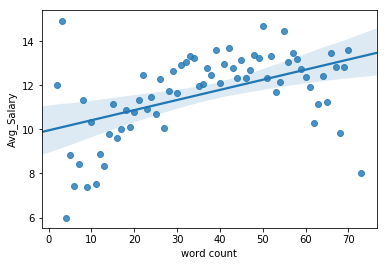

In [6]:
df = descr.groupby('count')['Avg_Salary'].mean().reset_index()
sns.regplot(x=df["count"], y=(df["Avg_Salary"]))
plt.xlabel("word count")
plt.show()

In [7]:
from string import punctuation
punctuation
# Create a list of punctuation replacements
punctuation_symbols = []
for symbol in punctuation:
    punctuation_symbols.append((symbol, ''))
    
punctuation_symbols

[('!', ''),
 ('"', ''),
 ('#', ''),
 ('$', ''),
 ('%', ''),
 ('&', ''),
 ("'", ''),
 ('(', ''),
 (')', ''),
 ('*', ''),
 ('+', ''),
 (',', ''),
 ('-', ''),
 ('.', ''),
 ('/', ''),
 (':', ''),
 (';', ''),
 ('<', ''),
 ('=', ''),
 ('>', ''),
 ('?', ''),
 ('@', ''),
 ('[', ''),
 ('\\', ''),
 (']', ''),
 ('^', ''),
 ('_', ''),
 ('`', ''),
 ('{', ''),
 ('|', ''),
 ('}', ''),
 ('~', '')]

In [8]:
# Examine list of stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sanket\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
import string

# Create a function to remove punctuations
def remove_punctuation(sentence: str) -> str:
    return sentence.translate(str.maketrans('', '', string.punctuation))

# Create a function to remove stop words
def remove_stop_words(x):
    x = ' '.join([i for i in x.lower().split(' ') if i not in stop])
    return x

# Create a function to lowercase the words
def to_lower(x):
    return x.lower()

In [10]:
# Stem the Words
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()
X['job_desig'] = X['job_desig'].apply(porter.stem)

X['job_desig'] = X['job_desig'].apply(remove_punctuation)
X['job_desig'] = X['job_desig'].apply(remove_stop_words)
X['job_desig'] = X['job_desig'].apply(to_lower)

X['key_skills'] = X['key_skills'].apply(remove_punctuation)
X['key_skills'] = X['key_skills'].apply(remove_stop_words)
X['key_skills'] = X['key_skills'].apply(to_lower)

X['City coded'] = X['City coded'].apply(to_lower)

C:\Users\Sanket\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Sanket\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Sanket\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.

In [11]:
X.head()

,job_desig,key_skills,City coded,Avg_Exp,Avg_Salary,company_name_encoded
0,senior exploit vulnerability research,team skills communication skills analytical sk...,delhi ncr,6,8,3687
1,head scm,ppc logistics inventory management supply chai...,tier 2,13,12,458
2,deputy manager talent management leadership ...,hr analytics employee engagement training succ...,delhi ncr,7,20,4195
3,associate manager data engin,sql javascript automation python ruby analytic...,bengaluru,8,12,313
4,ts gsa senior analyst,accounting finance cash flow financial plannin...,delhi ncr,2,4,1305


In [12]:
# CountVectorizer - name & categories
cv = CountVectorizer(min_df=10)
X_job_desig = cv.fit_transform(X['job_desig'])
cv1 = CountVectorizer(min_df=10)
X_key_skills = cv1.fit_transform(X['key_skills'])
cv2 = CountVectorizer(min_df=10)
X_City_coded = cv2.fit_transform(X['City coded'])

In [13]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer()
X_job_desig = tfidf.fit_transform(X_job_desig)
tfidf1 = TfidfTransformer()
X_key_skills = tfidf1.fit_transform(X_key_skills)
tfidf2 = TfidfTransformer()
X_City_coded = tfidf2.fit_transform(X_City_coded)

In [14]:
X_dummies = csr_matrix(pd.get_dummies(X[['company_name_encoded', 'Avg_Exp']], sparse=True).values)
X_dummies

<19801x2 sparse matrix of type '<class 'numpy.int64'>'
	with 39154 stored elements in Compressed Sparse Row format>

In [15]:
sparse_merge = hstack((X_job_desig, 
                       X_key_skills, X_City_coded, X_dummies)).tocsr()

In [16]:
sparse_merge

<19801x2209 sparse matrix of type '<class 'numpy.float64'>'
	with 269352 stored elements in Compressed Sparse Row format>

In [17]:
#------------------------------------------------------------------------------------------

In [18]:
test = pd.read_csv("TestDataset1.csv")

In [19]:
test['Exp'] = test["experience"].str.extract("(\d*\d.?\d+)", expand=True)
test['Exp'] = test['Exp'].str.split('-')
test[['start','end']] = pd.DataFrame(test.Exp.values.tolist())
test['Avg_Exp'] = test[['start','end']].astype(float).mean(axis=1)
Xtest = test[['job_desig', 'key_skills', 'Avg_Exp', 'location', 'company_name_encoded']]

Xtest.dropna(subset=['key_skills'], inplace=True)
Xtest['Avg_Exp'] = Xtest['Avg_Exp'].astype(int)
Xtest['City coded'] = Xtest['location']
Xtest = Xtest.drop(['location'], axis = 1)

C:\Users\Sanket\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\Sanket\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Sanket\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__m

In [20]:
Xtest.head()

,job_desig,key_skills,Avg_Exp,company_name_encoded,City coded
0,IT Technology Senior Consultant/java/ J2ee/ Se...,"Java, J2Ee, Tomcat, JBoss, Weblogic, Oracle, E...",9,2066,Bengaluru
1,Medical Billing Process | International KPO | ...,"Medical Billing, Insurance Processing",2,2629,Ahmedabad
2,Oracle Sales Cloud Functional Consultant,"Oracle Sales, Functional Consultancy, Troubles...",4,2448,Bengaluru
3,Looking For Freshers WHO WANT To Work WITH US,"offline, online, internet, part time, home bas...",1,2711,Metro
4,Process Associate / Sr Process Associate / Tec...,"voice support, analytical skills, Process asso...",2,40,Hyderabad


In [21]:
Xtest['job_desig'] = Xtest['job_desig'].apply(porter.stem)

Xtest['job_desig'] = Xtest['job_desig'].apply(remove_punctuation)
Xtest['job_desig'] = Xtest['job_desig'].apply(remove_stop_words)
Xtest['job_desig'] = Xtest['job_desig'].apply(to_lower)

Xtest['key_skills'] = Xtest['key_skills'].apply(remove_punctuation)
Xtest['key_skills'] = Xtest['key_skills'].apply(remove_stop_words)
Xtest['key_skills'] = Xtest['key_skills'].apply(to_lower)

Xtest['City coded'] = Xtest['City coded'].apply(to_lower)

In [22]:
X_test_job_desig = cv.transform(Xtest['job_desig'])
X_test_key_skills = cv1.transform(Xtest['key_skills'])
X_test_City_coded = cv2.transform(Xtest['City coded'])


In [23]:
X_test_job_desig = tfidf.transform(X_test_job_desig)
X_test_key_skills = tfidf1.transform(X_test_key_skills)
X_test_City_coded = tfidf2.transform(X_test_City_coded)

In [24]:
X_test_dummies = csr_matrix(pd.get_dummies(Xtest[['company_name_encoded', 'Avg_Exp']], sparse=True).values)
X_test_dummies

<6601x2 sparse matrix of type '<class 'numpy.int64'>'
	with 13047 stored elements in Compressed Sparse Row format>

In [25]:
sparse_merge_test = hstack((X_test_job_desig, 
                       X_test_key_skills, X_test_City_coded, X_test_dummies)).tocsr()

In [26]:
sparse_merge_test

<6601x2209 sparse matrix of type '<class 'numpy.float64'>'
	with 89141 stored elements in Compressed Sparse Row format>

In [27]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(sparse_merge, X.Avg_Salary)

In [28]:
predicted = clf.predict(sparse_merge_test)

In [29]:
predicted

array([20,  1,  8, ..., 12, 20, 12])

In [30]:
predicted[:50]

array([20,  1,  8,  1,  1, 12, 37,  1, 12,  1, 37, 12, 20, 37, 20, 20,  1,
        1, 12, 20, 20, 20,  8,  8, 20,  4, 20, 37, 37, 12,  1, 20, 20, 37,
       37,  8, 20,  1,  1, 20,  1,  8, 37, 20,  8, 20,  4,  8, 37, 12])

# KNeighborsClassifier

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(sparse_merge, X.Avg_Salary, test_size=0.20)

In [32]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [33]:
y_pred = classifier.predict(X_test)

In [34]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[390 102  48  33  19   1]
 [206 203 123  46  16   2]
 [103 140 192 172  85   8]
 [ 62  79 172 371 231  16]
 [ 31  42  98 268 313  56]
 [  4   4  16  46 115 148]]
              precision    recall  f1-score   support

           1       0.49      0.66      0.56       593
           4       0.36      0.34      0.35       596
           8       0.30      0.27      0.28       700
          12       0.40      0.40      0.40       931
          20       0.40      0.39      0.39       808
          37       0.64      0.44      0.52       333

   micro avg       0.41      0.41      0.41      3961
   macro avg       0.43      0.42      0.42      3961
weighted avg       0.41      0.41      0.40      3961



# LinearRegression

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [36]:
X_train, X_test, y_train, y_test = train_test_split(sparse_merge, X.Avg_Salary, test_size = 0.2, random_state=9)

In [37]:
linr = LinearRegression()
linr.fit(X_train, y_train)
pred = linr.predict(X_test)

In [38]:
test_set_rmse = (np.sqrt(mean_squared_error(y_test, pred)))

test_set_r2 = r2_score(y_test, pred)

In [39]:
print(test_set_rmse)
print(test_set_r2)

6.757151336939335
0.5128498156815766


# RandomForestRegressor

In [40]:
X_train, X_test, y_train, y_test = train_test_split(sparse_merge, X.Avg_Salary, test_size = 0.25, random_state = 42)

In [41]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [42]:
preds = rf.predict(X_test)

In [43]:
from sklearn.metrics import mean_absolute_error
print('MAE:', mean_absolute_error(y_test, preds))

MAE: 4.772739625510569


In [44]:
errors = abs(preds - y_test)
errors

9130      6.940000
12413     4.469333
4694      2.323333
13003     0.693667
14304     4.095500
14164     4.202000
2236      4.230000
2248      7.423222
8089      6.108000
6495      4.898512
15336     3.666667
18007     2.610000
2880      5.090667
13308     8.503333
7242      3.923333
9050      0.235000
4374      2.905000
2731      4.854762
18305    11.433000
7579      1.466667
17832     2.746071
2251      9.137000
7248      7.200000
10114     0.405000
9991      0.450000
8014      5.660000
5377      0.140000
16097     0.480000
14152     9.521667
19671     2.727262
           ...    
13642     2.400000
1651      0.868000
11397     5.720000
7285      4.542167
11551     1.400000
8011      5.166667
435       7.453333
14941     8.205000
15338     3.596667
13839     0.213333
10218    16.568857
17997     9.566167
2563      6.300000
18567     0.367000
18851     3.129000
3199      0.370000
14741     0.457333
13771    14.294976
17269     2.473667
16555     0.918167
19595     7.580952
5413      0.

In [45]:
print('Metrics for Random Forest Trained on Expanded Data')
print('Average absolute error:', round(np.mean(errors), 2), 'degrees.')

Metrics for Random Forest Trained on Expanded Data
Average absolute error: 4.77 degrees.


In [46]:
mape = np.mean(100 * (errors / y_test))

In [47]:
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 15.11 %.


In [48]:
from xgboost import XGBClassifier

In [49]:
model = XGBClassifier(n_estimators=200)
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=200, n_jobs=1, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [50]:
# make predictions for test data
y_pred = model.predict(X_test)

In [51]:
predictions = [round(value) for value in y_pred]

In [52]:
# evaluate predictions
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 43.93%


In [53]:
y_pred_test = model.predict(sparse_merge_test)

In [54]:
y_pred_test

array([20,  1, 12, ..., 20, 20, 12])

In [55]:
y_pred_test[:50]

array([20,  1, 12,  1,  1,  8, 20,  1, 20,  1, 20, 12, 12, 20,  4,  8,  1,
        1, 12,  4,  8, 37,  8,  8, 12,  1, 20, 12, 20,  4,  1, 20, 12, 20,
       37,  8, 12,  1,  1, 12, 12,  8, 37,  8,  8,  8,  4, 12, 12, 12])

# GridsearchCV

In [56]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [57]:
X_train, X_test, y_train, y_test = train_test_split(sparse_merge, X.Avg_Salary, test_size = 0.25, random_state = 42)

In [58]:
elastic_net = ElasticNet()

In [59]:
param_grid = {"l1_ratio": np.arange(0.0, 1.0, 0.1)}

In [60]:
gscv = GridSearchCV(elastic_net, param_grid, scoring='r2', cv=10, n_jobs= -1)

In [61]:
gscv

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [62]:
gscv.fit(X_train, y_train)

C:\Users\Sanket\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [63]:
y_pred = gscv.predict(X_test)
r2 = gscv.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)

In [64]:
print(y_pred)
print(r2)
print(mse)

[ 5.69781029  9.40091889  7.24923103 ... 13.50024462 10.70359676
  8.73784418]
0.44542093898266466
51.705814291717644


In [65]:
y_pred[:50]

array([ 5.69781029,  9.40091889,  7.24923103, 10.42350346,  5.47122406,
        7.74202845, 29.96046697, 13.86261541, 18.26647671, 10.5831604 ,
        8.86066393,  3.92102605, 14.76237278,  7.32034283,  9.39648741,
        4.46666229,  7.88579135, 10.22432623, 22.03063684,  8.52305412,
        7.51728793, 26.16852162, 15.67545695,  3.94773848,  4.19590163,
       10.73285475,  5.79018532,  7.79234859,  9.30790003, 15.18896578,
       10.52301063, 20.52284851, 10.36729937, 13.52198421,  4.34789911,
       13.90652095,  9.19324411,  7.0028003 ,  8.81991129, 12.76845029,
       14.03717814, 10.12655228, 18.69288728, 16.65223817, 11.81939817,
        9.20092864,  8.57336515, 15.3349403 , 14.03717814, 10.32551183])

In [66]:
y_pred_test = gscv.predict(sparse_merge_test)

In [67]:
y_pred_test[:50]

array([16.93234514,  5.70961076,  8.95846842,  4.21634756,  5.15481659,
       10.1266885 , 26.13641282,  4.0683636 , 13.78061726,  5.05907509,
       21.41091961, 13.60899978, 10.33540618, 18.52345521,  8.49383322,
        7.09919785,  7.02783797,  3.97973361, 13.70796525,  8.66333212,
        7.15195131, 23.49866262,  7.52622287,  9.99455094, 11.74279047,
        2.30295051, 21.56907149, 13.43605928, 16.67194028,  7.00319116,
        4.22668799, 13.78861012, 10.32700267, 13.72111836, 31.44321284,
       10.11592771, 10.36450695,  4.17137447,  2.49092571, 10.31785596,
       10.65481958, 10.41874595, 25.02104083,  7.03299546,  6.79509802,
       11.97094909,  6.80107692, 12.10135439, 13.57296207,  8.59985429])

In [93]:
y_pred_test = np.around(y_pred_test)

In [94]:
y_pred_test[:50]

array([17.,  6.,  9.,  4.,  5., 10., 26.,  4., 14.,  5., 21., 14., 10.,
       19.,  8.,  7.,  7.,  4., 14.,  9.,  7., 24.,  8., 10., 12.,  2.,
       22., 13., 17.,  7.,  4., 14., 10., 14., 31., 10., 10.,  4.,  2.,
       10., 11., 10., 25.,  7.,  7., 12.,  7., 12., 14.,  9.])

In [95]:
Xtest['salary'] = y_pred_test

In [96]:
Xtest.head()

,job_desig,key_skills,Avg_Exp,company_name_encoded,City coded,salary
0,technology senior consultantjava j2ee sever ap...,java j2ee tomcat jboss weblogic oracle elastic...,9,2066,bengaluru,17.0
1,medical billing process international kpo in...,medical billing insurance processing,2,2629,ahmedabad,6.0
2,oracle sales cloud functional consult,oracle sales functional consultancy troublesho...,4,2448,bengaluru,9.0
3,looking freshers want work u,offline online internet part time home base wo...,1,2711,metro,4.0
4,process associate sr process associate tech ...,voice support analytical skills process associ...,2,40,hyderabad,5.0


In [97]:
Xtest.to_csv('C:/Users/Sanket/Desktop/SalarypredictionNLP.csv')

In [98]:
trial = pd.read_csv('SalarypredictionNLP.csv')

In [99]:
trial.head()

,Unnamed: 0,job_desig,key_skills,Avg_Exp,company_name_encoded,City coded,salary
0,0,technology senior consultantjava j2ee sever ap...,java j2ee tomcat jboss weblogic oracle elastic...,9,2066,bengaluru,16.93
1,1,medical billing process international kpo in...,medical billing insurance processing,2,2629,ahmedabad,5.71
2,2,oracle sales cloud functional consult,oracle sales functional consultancy troublesho...,4,2448,bengaluru,8.96
3,3,looking freshers want work u,offline online internet part time home base wo...,1,2711,metro,4.22
4,4,process associate sr process associate tech ...,voice support analytical skills process associ...,2,40,hyderabad,5.15
